Checking if initial submitted solution is still part of the solution space...
363 363   || HD (8.39) with HD ||
no ==> MIN: 8.55 Flux value: 8.39 MAX: 527.01812832  -  ATPM
Out of boundary as we adjusted the ATPM value (NGAM) to oxygen conversion rate from S2R+ cells [1]
     [1] Da‐Ré, Caterina, et al.; EMBO reports 15.5 (2014): 586-591; https://www.ncbi.nlm.nih.gov/pubmed/24639557 

363 362   || HD (8.55) with HD ||
363 363   || HD 2x Sucr (8.39) with HD 2x Sucr ||
no ==> MIN: 8.55 Flux value: 8.39 MAX: 948.11257448  -  ATPM
Out of boundary as we adjusted the ATPM value (NGAM) to oxygen conversion rate from S2R+ cells [1]
     [1] Da‐Ré, Caterina, et al.; EMBO reports 15.5 (2014): 586-591; https://www.ncbi.nlm.nih.gov/pubmed/24639557 

363 362   || HD 2x Sucr (8.55) with HD 2x Sucr ||
363 363   || HD 2x EAA (8.39) with HD 2x EAA ||
no ==> MIN: 8.55 Flux value: 8.39 MAX: 516.61751691  -  ATPM
Out of boundary as we adjusted the ATPM value (NGAM) to oxygen conversion rate from S2R+ cell

C:\FlySilico\envs\default\lib\site-packages\ipykernel_launcher.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\FlySilico\envs\default\lib\site-packages\ipykernel_launcher.py:106: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\FlySilico\envs\default\lib\site-packages\ipykernel_launcher.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#

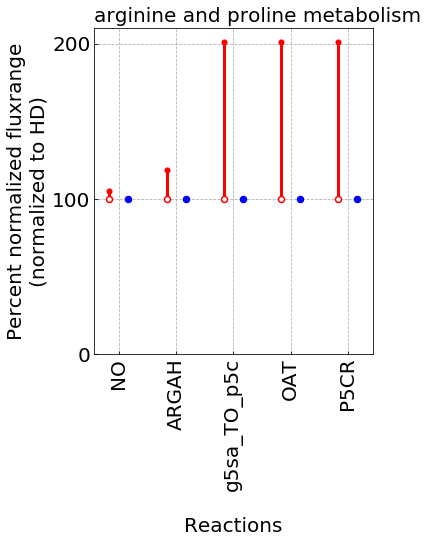

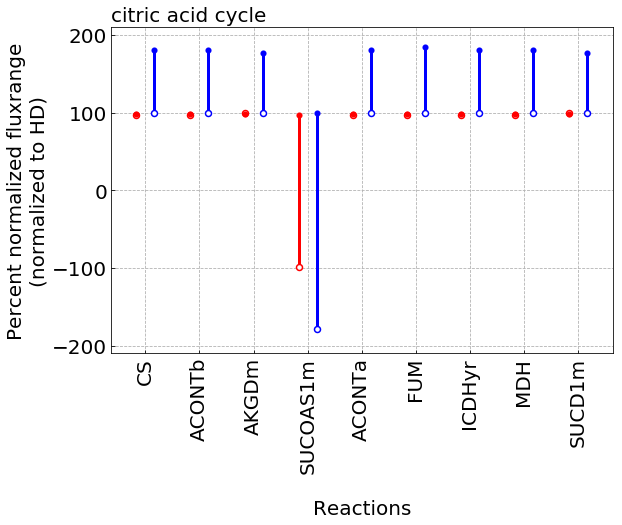

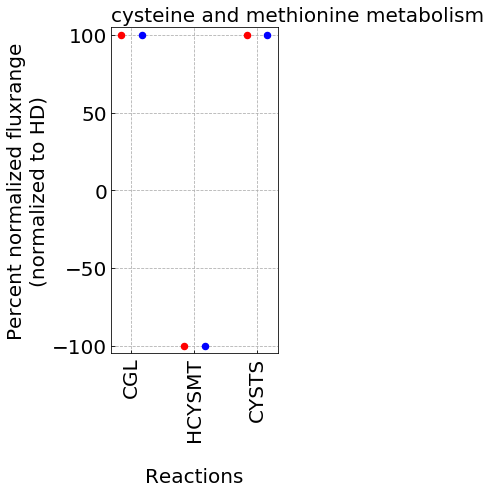

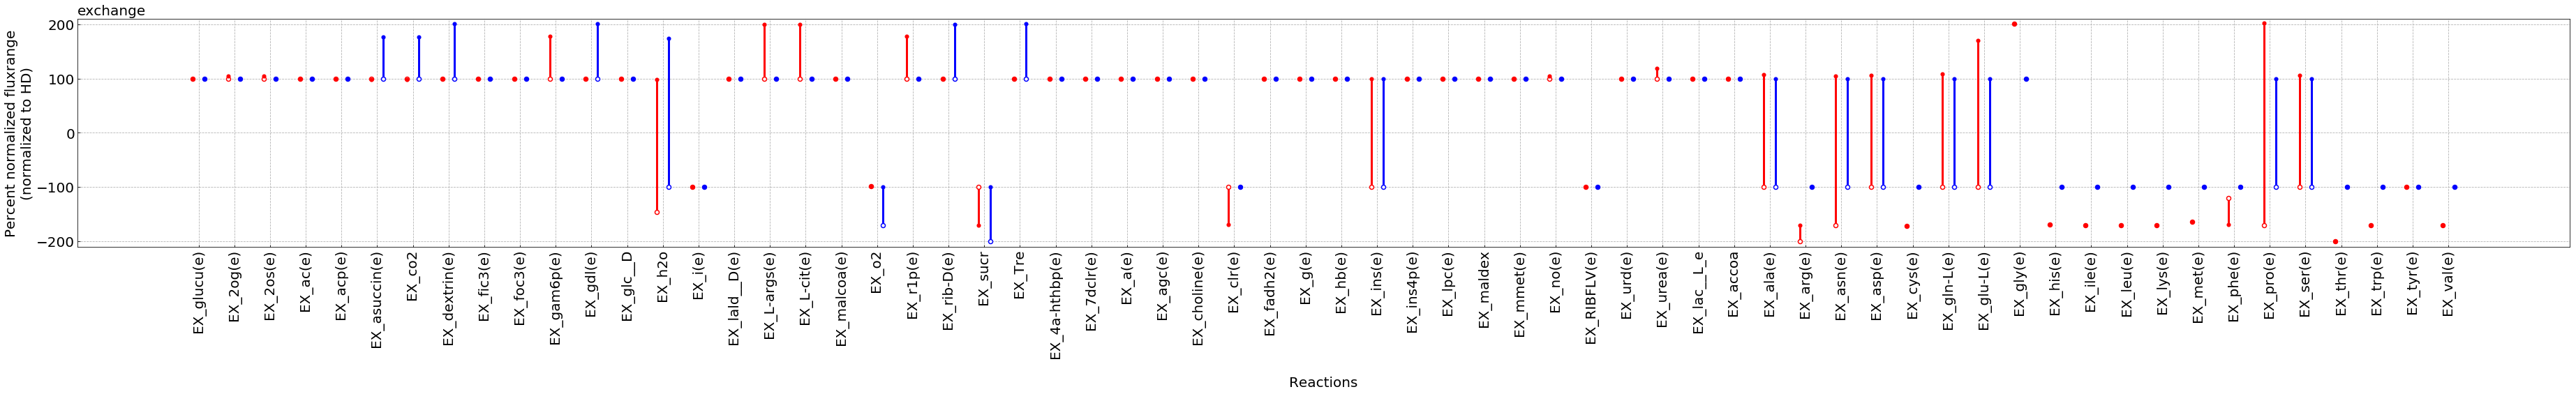

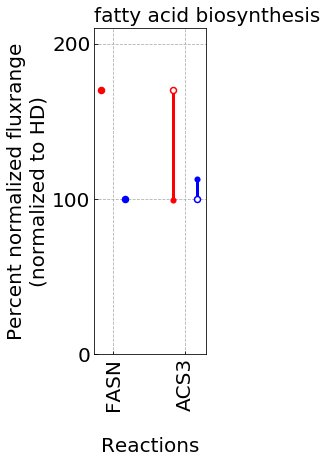

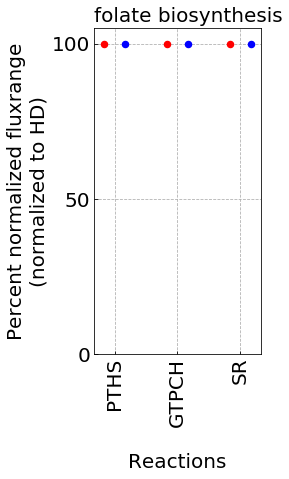

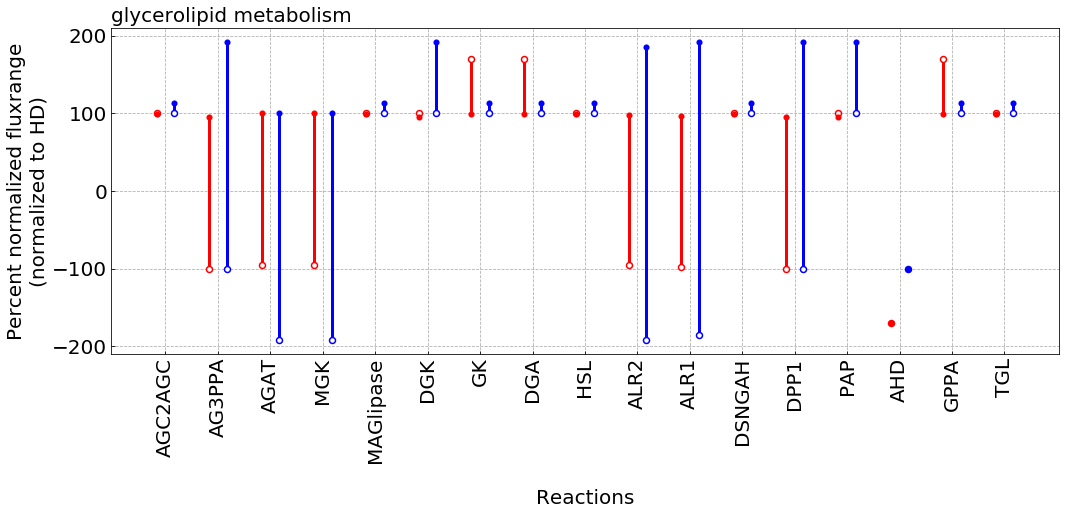

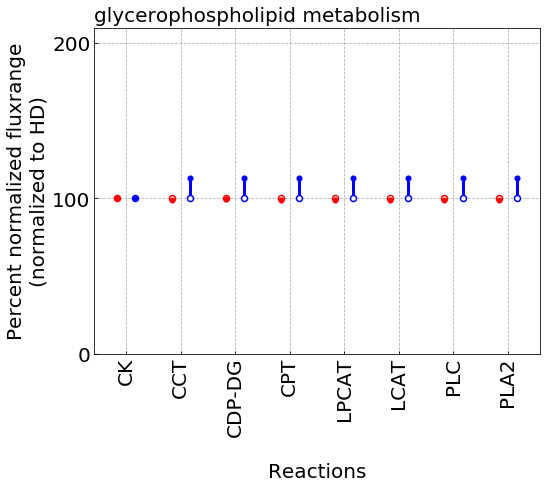

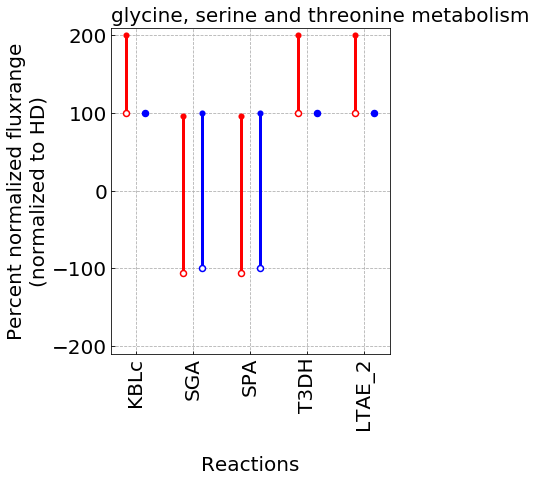

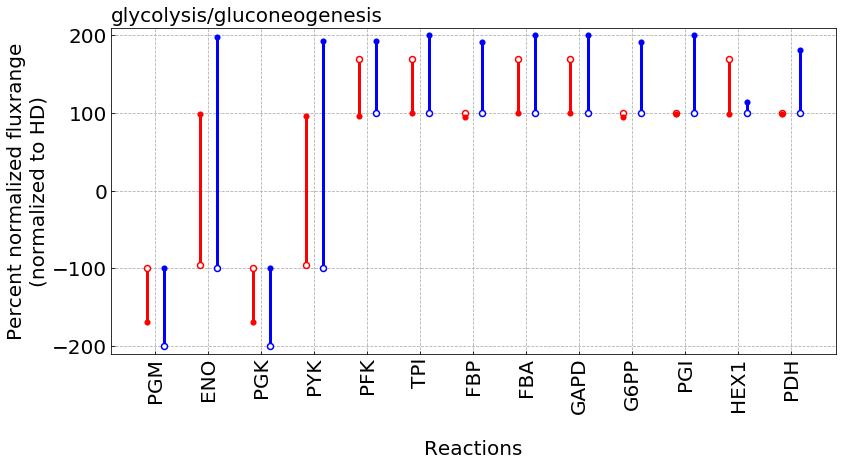

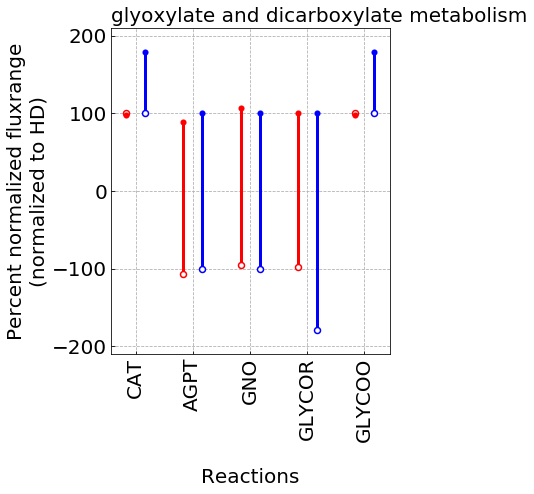

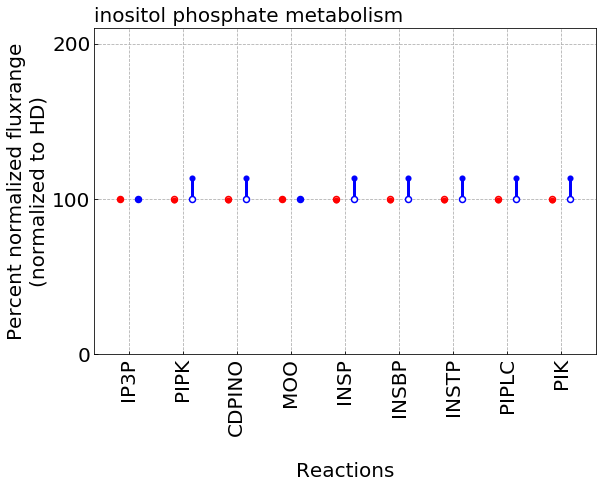

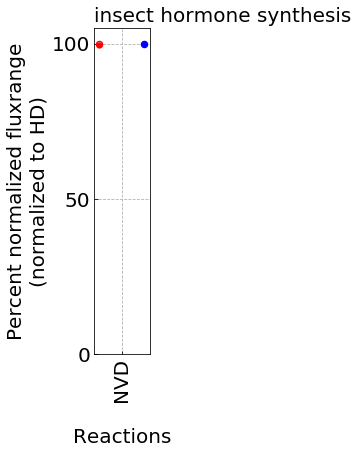

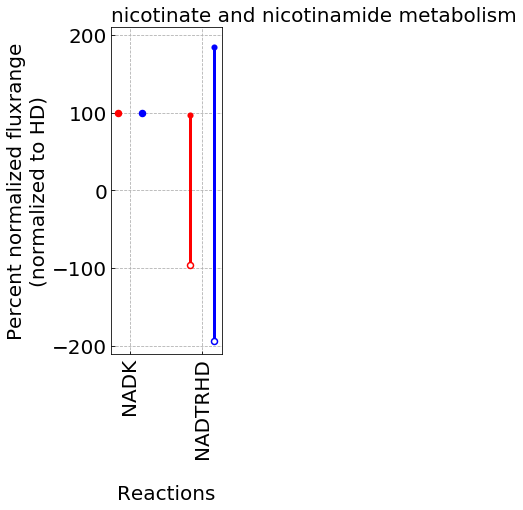

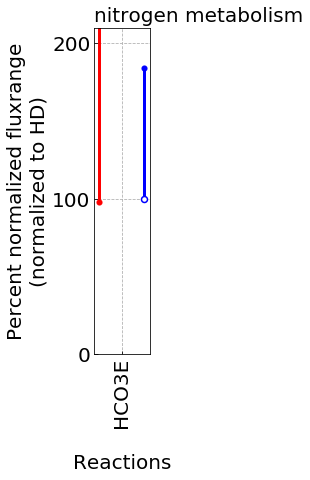

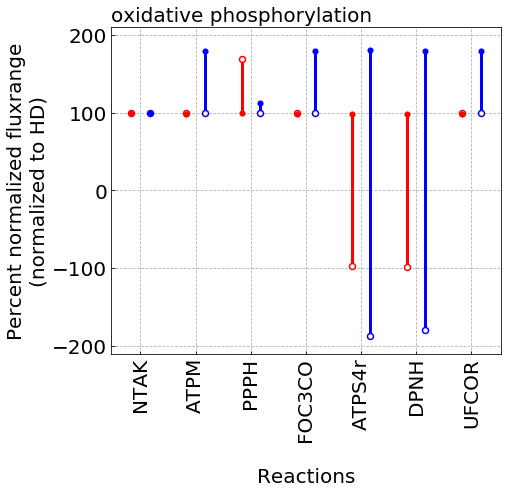

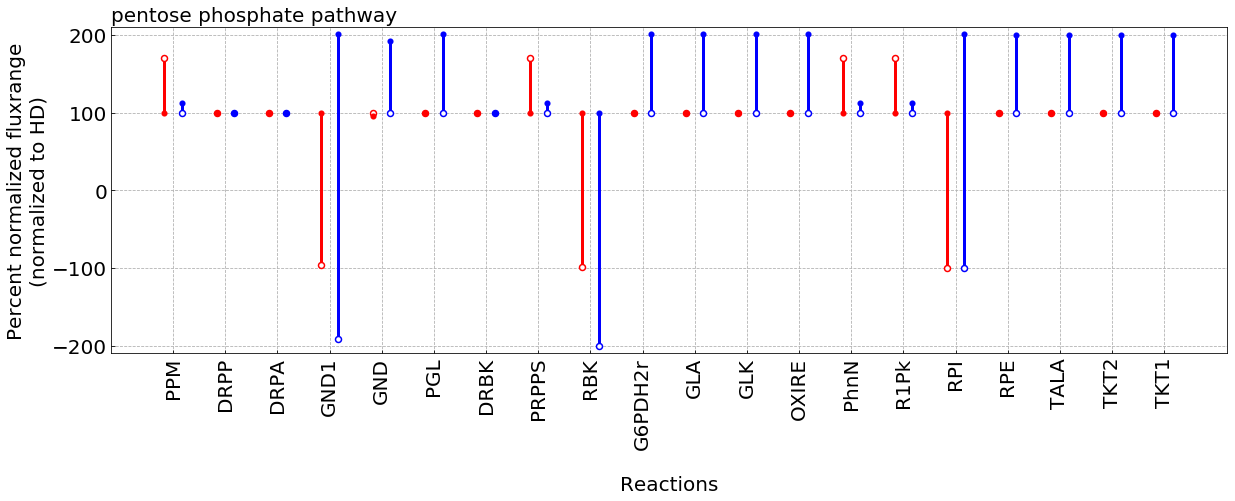

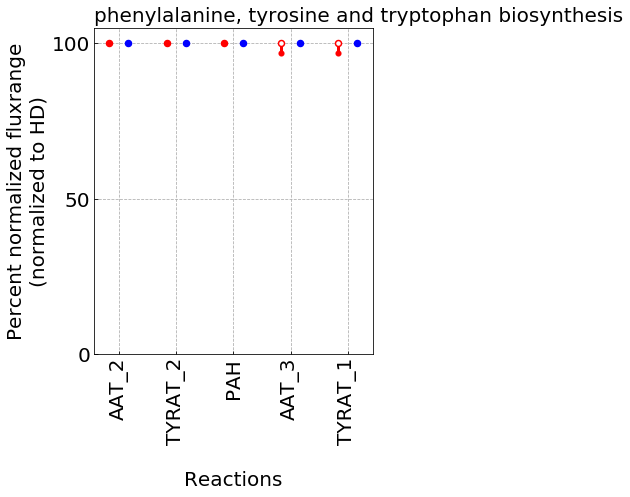

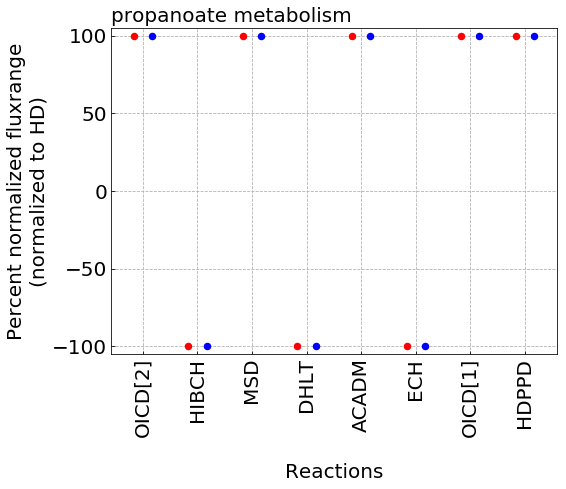

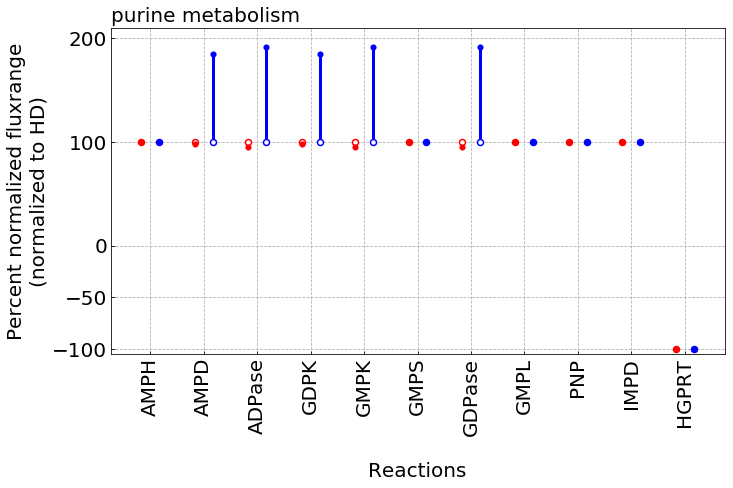

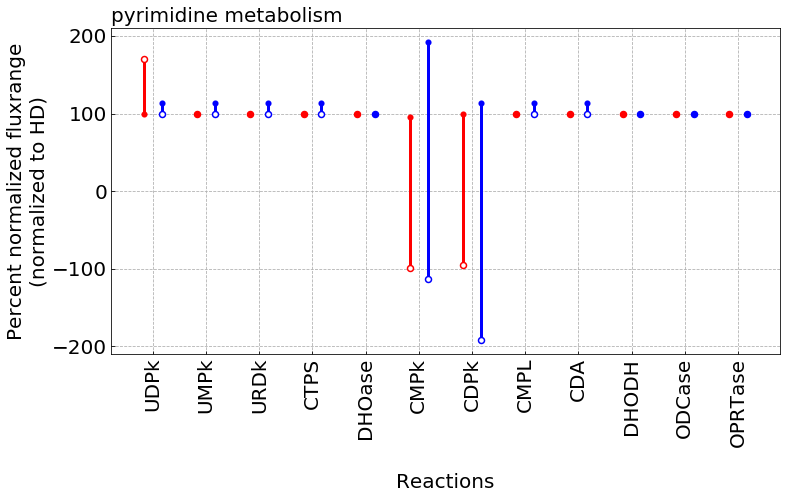

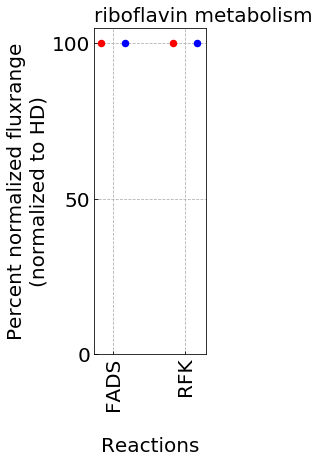

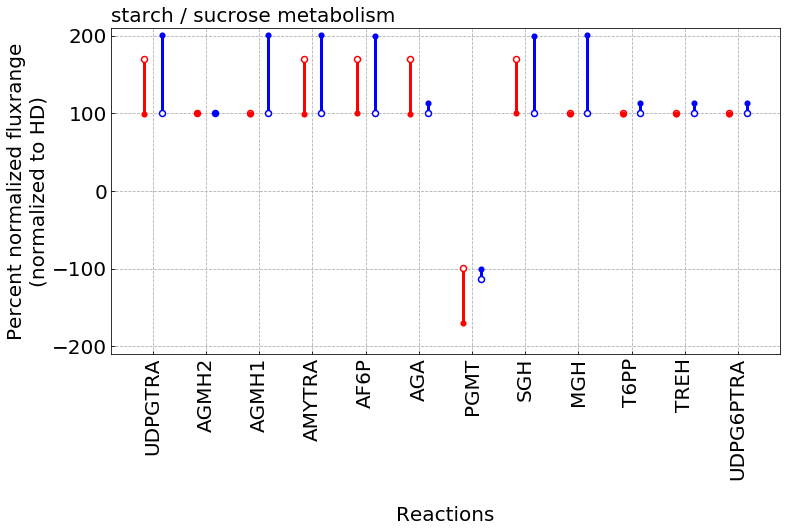

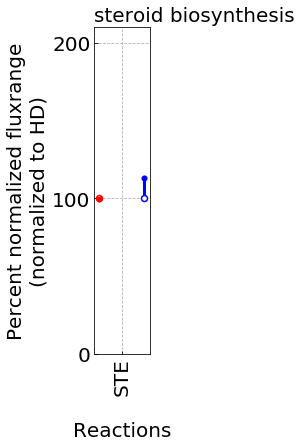

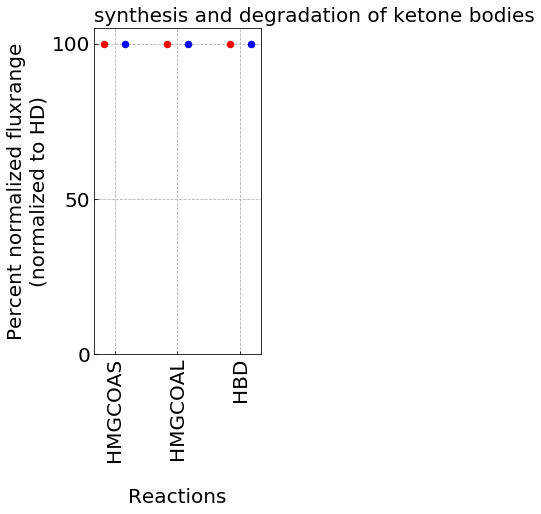

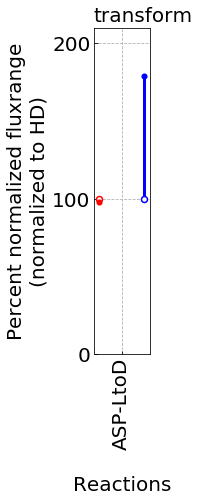

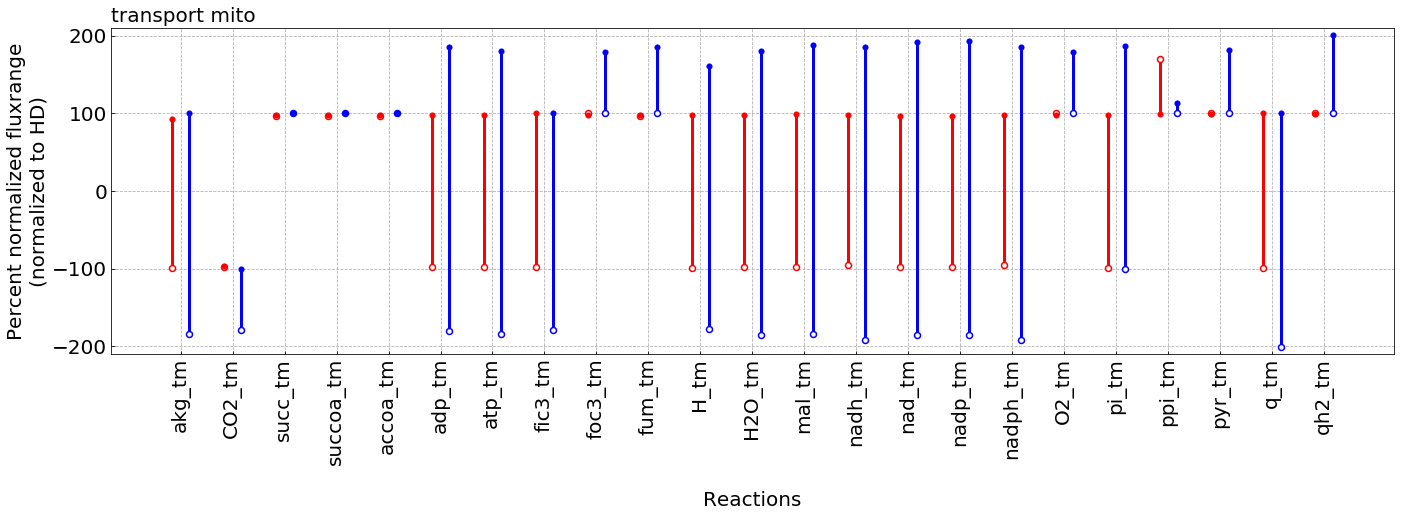

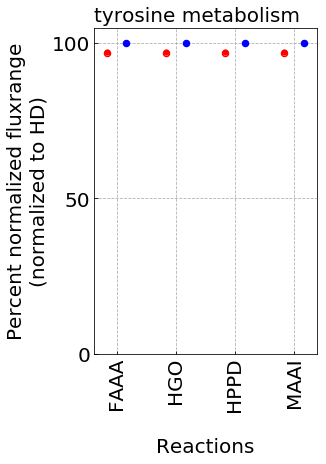

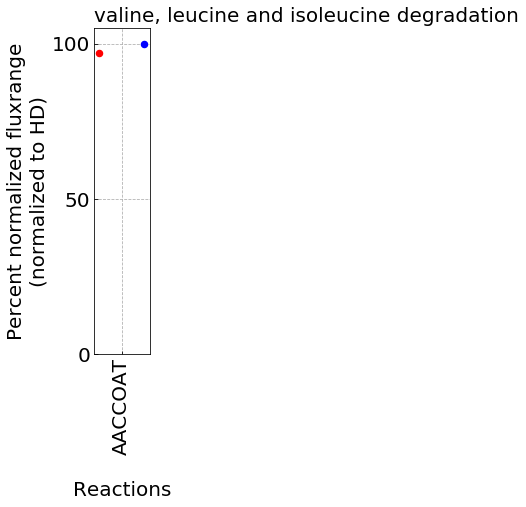

In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
import math,sys
from scipy import stats
%matplotlib inline
sys.path.append('..')

sign = lambda x: math.copysign(1, x)

fluxes = pd.read_excel("FlySilico_Fluxes.xlsx")
fva_list = pd.read_excel("FVA_all.xlsx",header=[0,1])

condi_l = ["HD (8.39)", "HD (8.55)","HD 2x Sucr (8.39)","HD 2x Sucr (8.55)","HD 2x EAA (8.39)","HD 2x EAA (8.55)"]
condi_names = condi_l#["fva_ll", "fva_ll_c","fva_suc","fva_suc_c","fva_eaa","fva_eaa_c"]
fluxes_con_l = ["HD","HD","HD 2x Sucr","HD 2x Sucr","HD 2x EAA","HD 2x EAA"]
print "Checking if initial submitted solution is still part of the solution space..."

for condi,fluxes_con,condi_n in zip(condi_l,fluxes_con_l,condi_names):
    count = 0
    for i in fva_list.index:
        if np.round(fva_list[condi].loc[i]["minimum"],6) <= np.round(fluxes[fluxes["Reaction"] == i][fluxes_con].values[0],6) and np.round(fluxes[fluxes["Reaction"] == i][fluxes_con].values[0],6) <= np.round(fva_list[condi].loc[i]["maximum"],6):
            count += 1
        else:
            print "no ==>","MIN:", np.round(fva_list[condi].loc[i]["minimum"],8),"Flux value:",np.round(fluxes[fluxes["Reaction"] == i][fluxes_con].values[0],8),"MAX:", np.round(fva_list[condi].loc[i]["maximum"],8)," - ", i
            if i == "ATPM":
                print "Out of boundary as we adjusted the ATPM value (NGAM) to oxygen conversion rate from S2R+ cells [1]"
                print u"     [1] Da‐Ré, Caterina, et al.; EMBO reports 15.5 (2014): 586-591; https://www.ncbi.nlm.nih.gov/pubmed/24639557 \n"
    print len(fva_list[condi].index), count,"  ||", condi_n,"with", fluxes_con,"||"

#########################################################################################################################
    
list_filt = fva_list[["HD (8.55)","HD 2x Sucr (8.55)","HD 2x EAA (8.55)"]]
diff_list_suc = []
diff_list_eaa = []
diff_list = []

for i in list_filt.index[:]:
    max_hd = np.round(list_filt.loc[i]["HD (8.55)"]["maximum"],5)
    min_hd = np.round(list_filt.loc[i]["HD (8.55)"]["minimum"],5)
    
    max_hdsuc = np.round(list_filt.loc[i]["HD 2x Sucr (8.55)"]["maximum"],5)
    min_hdsuc = np.round(list_filt.loc[i]["HD 2x Sucr (8.55)"]["minimum"],5)
    
    max_hdeaa = np.round(list_filt.loc[i]["HD 2x EAA (8.55)"]["maximum"],5)#.00001
    min_hdeaa =np.round(list_filt.loc[i]["HD 2x EAA (8.55)"]["minimum"],5)#.00001
    
    max_suc = sign(max_hdsuc)*np.divide(max_hdsuc, max_hd, out=np.ones_like(max_hdsuc), where=max_hd!=0)*100
    if sign(max_hdsuc) == sign(max_hd):
        max_suc_s = "Same"
    else:
        max_suc_s = "not"
        
    min_suc = sign(min_hdsuc)*np.divide(min_hdsuc, min_hd, out=np.ones_like(min_hdsuc), where=min_hd!=0)*100
    if sign(min_hdsuc) == sign(min_hd):
        min_suc_s = "Same"
    else:
        min_suc_s = "not"

    max_eaa = sign(max_hdeaa)*np.divide(max_hdeaa, max_hd, out=np.ones_like(max_hdeaa), where=max_hd!=0)*100
    if sign(max_hdeaa) == sign(max_hd):
        max_eaa_s = "Same"
    else:
        max_eaa_s = "not"

    min_eaa = sign(min_hdeaa)*np.divide(min_hdeaa, min_hd, out=np.ones_like(min_hdeaa), where=min_hd!=0)*100
    if sign(min_hdeaa) == sign(min_hd):
        min_eaa_s = "Same"
    else:
        min_eaa_s = "not"

    diff_list += [max_suc,min_suc,max_eaa,min_eaa,      max_suc_s,min_suc_s,max_eaa_s,min_eaa_s]
    
#########################################################################################################################

diff_list_np = np.array(diff_list).reshape(len(list_filt.index[:]),8)

fva_list["Diff HD 2x SUCR - HD (max)"] = ""
fva_list["Diff HD 2x SUCR - HD (min)"] = ""
fva_list["Diff HD 2x EAA - HD (max)"] = ""
fva_list["Diff HD 2x EAA - HD (min)"] = ""

fva_list["Diff HD 2x SUCR - HD (max) - sign"] = ""
fva_list["Diff HD 2x SUCR - HD (min) - sign"] = ""
fva_list["Diff HD 2x EAA - HD (max) - sign"] = ""
fva_list["Diff HD 2x EAA - HD (min) - sign"] = ""

for name,val in zip(list_filt.index,diff_list_np):
    fva_list.set_value(name, 'Diff HD - HD 2x SUCR (max)', val[0])
    fva_list.set_value(name, 'Diff HD - HD 2x SUCR (min)', val[1])
    fva_list.set_value(name, 'Diff HD - HD 2x EAA (max)', val[2])
    fva_list.set_value(name, 'Diff HD - HD 2x EAA (min)', val[3])
    
    fva_list.set_value(name, 'Diff HD - HD 2x SUCR (max) - sign', val[4])
    fva_list.set_value(name, 'Diff HD - HD 2x SUCR (min) - sign', val[5])
    fva_list.set_value(name, 'Diff HD - HD 2x EAA (max) - sign', val[6])
    fva_list.set_value(name, 'Diff HD - HD 2x EAA (min) - sign', val[7])

    
df_filt = fva_list[["HD (8.55)","HD 2x Sucr (8.55)","HD 2x EAA (8.55)",'Diff HD - HD 2x SUCR (max)','Diff HD - HD 2x SUCR (min)',
                    'Diff HD - HD 2x EAA (max)','Diff HD - HD 2x EAA (min)','Diff HD - HD 2x SUCR (max) - sign','Diff HD - HD 2x SUCR (min) - sign',
                   'Diff HD - HD 2x EAA (max) - sign','Diff HD - HD 2x EAA (min) - sign']]

suc_max2 = np.round(np.array((df_filt["Diff HD - HD 2x SUCR (max)"]).tolist()).astype(float),5)
df_filt["Diff HD - HD 2x SUCR (max)"] = (suc_max2)

suc_min2 = np.round(np.array((df_filt["Diff HD - HD 2x SUCR (min)"]).tolist()).astype(float),5)
df_filt["Diff HD - HD 2x SUCR (min)"] = (suc_min2)

eaa_max2 = np.round(np.array((df_filt["Diff HD - HD 2x EAA (max)"]).tolist()).astype(float),5)
df_filt["Diff HD - HD 2x EAA (max)"] = (eaa_max2)#

eaa_min2 = np.round(np.array((df_filt["Diff HD - HD 2x EAA (min)"]).tolist()).astype(float),5)
df_filt["Diff HD - HD 2x EAA (min)"] = (eaa_min2)

#########################################################################################################################

df_filt[["HD (8.55)","Diff HD - HD 2x SUCR (max)","Diff HD - HD 2x SUCR (min)","Diff HD - HD 2x EAA (max)","Diff HD - HD 2x EAA (min)"]]

full_end_all = df_filt[["HD (8.55)","Diff HD - HD 2x SUCR (max)","Diff HD - HD 2x SUCR (min)","Diff HD - HD 2x EAA (max)","Diff HD - HD 2x EAA (min)"]]#pd.DataFrame(np.array([suc_max_val,suc_min_val,eaa_max_val,eaa_min_val]).T,index=df_filt.index)
full_end_all = full_end_all[(full_end_all.T != 0).any()]

df_model = pd.read_excel("../FlySilico_v1.xls")
subsys = df_model["Subsystem"].str.lower().unique()
gly_list_all = []
s_name_list = []

for s_name in subsys:
    gly_list = (df_model["Abbreviation"][df_model["Subsystem"].str.lower() == s_name]).values
    
    if len(gly_list[np.isin(gly_list,full_end_all.index)]) == 0:
        gly_list = "NO_REA"
    gly_list_all += [gly_list]
    s_name_list += [s_name]

for gly_list,s_name in zip(gly_list_all,s_name_list):
    if gly_list is not "NO_REA":
        gly_list = gly_list[np.isin(gly_list,full_end_all.index)]
        full_end = full_end_all.loc[gly_list]

        plt.figure(figsize=(len(gly_list),6))
    
        if round(max(np.max(full_end).values),0) > 100:
            max_y = 200
        elif 100 >= round(max(np.max(full_end).values),0) > 0:
            max_y = 100
        else:
            max_y = 0
        if round(min(np.min(full_end).values),0) < -100:
            min_y = -200
        elif -100 <= round(min(np.min(full_end).values),0) < 0:
            min_y = -100
        else:
            min_y = 0
        
        plt.scatter(np.arange((len(full_end))*3)[0:-1:3],full_end["Diff HD - HD 2x EAA (min)"].values, color="red",zorder=5,linewidth=1.5,facecolors='white', edgecolors='r')
        plt.scatter(np.arange((len(full_end))*3)[0:-1:3],full_end["Diff HD - HD 2x EAA (max)"].values, color="red",zorder=5,linewidth=0.1)
        plt.vlines(np.arange((len(full_end))*3)[0:-1:3],full_end["Diff HD - HD 2x EAA (min)"].values, full_end["Diff HD - HD 2x EAA (max)"].values,color="red",lw=3)
 
        plt.scatter(np.arange((len(full_end))*3)[1:-1:3],full_end["Diff HD - HD 2x SUCR (min)"].values, color="blue",zorder=5,linewidth=1.5,facecolors='white', edgecolors='b')
        plt.scatter(np.arange((len(full_end))*3)[1:-1:3],full_end["Diff HD - HD 2x SUCR (max)"].values, color="blue",zorder=5,linewidth=0.1)
        plt.vlines(np.arange((len(full_end))*3)[1:-1:3],full_end["Diff HD - HD 2x SUCR (min)"].values, full_end["Diff HD - HD 2x SUCR (max)"].values,color="blue",lw=3)
        
        plt.title(s_name, loc='left',size=20)
        plt.yticks(np.unique([min_y,min_y/2.,0,max_y/2.,max_y]), size=20)
        plt.xticks(np.arange(0.5,len(full_end.index)*3+1,3)[:-1],full_end.index.tolist(),size=20,rotation='vertical')
        plt.ylabel("Percent normalized fluxrange\n(normalized to HD)", size = 20)
        plt.xlabel("\nReactions", size = 20)
        plt.ylim(min_y*1.05,max_y*1.05)

        plt.grid(True,axis='x',linestyle="--",zorder=-6)
        plt.grid(True,axis='y',linestyle="--",zorder=-6)
        plt.tick_params(axis="y",direction="in")
        plt.tick_params(axis="x",direction="in")

        #plt.savefig("%s_plot.png" % s_name.replace("/",","), format="png", dpi=300, bbox_inches="tight")


In [5]:
#fva_save = df_filt[["Diff HD - HD 2x SUCR (max)","Diff HD - HD 2x SUCR (min)","Diff HD - HD 2x EAA (max)","Diff HD - HD 2x EAA (min)"]]
#writer = pd.ExcelWriter('FVA_flux_change.xlsx', engine='xlsxwriter')
#fva_save.to_excel(writer,'fva_flux_change')

#worksheet = writer.sheets['fva_flux_change']

#writer.save()

In [3]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(25,10))

gs1 = GridSpec(2, 2,width_ratios=[2, 2], height_ratios=[3, 2])
gs1.update(left=0.05, right=0.48, wspace=0.15,hspace=0.38)
ax1 = plt.subplot(gs1[:-1, :])
ax2 = plt.subplot(gs1[-1,:-1])
ax3 = plt.subplot(gs1[1, 1])

#########################################################################################################################
        
central_c_meta =sorted(["AKGDm","ATPS4r", "FOC3CO","FUM","G6PDH2r","GND","HEX1","ICDHyr","LDH_L","PFK","PGL","PhnN", "PPPH","R1Pk","RPI","SUCD1m","SUCOAS1m","TPI","UFCOR","FBA", "PDH","GAPD","PGK","PGM","ENO","PYK","CS","MDH","PRPPS","PGI"])
suc_meta = sorted(["AF6P","AGMH1","AMYTRA","MGH","SGH","UDPGTRA"])
lip_meta = sorted(["ACS3","AHD","DGA","FASN","GK","GPPA"])

for plotx,meta,meta_n,lab in zip([ax1,ax2,ax3],[central_c_meta,suc_meta,lip_meta],["central_c_meta","suc_meta","lip_meta"],["A","B","C"]):
    full_end = full_end_all.loc[meta]
    
    if round(max(np.max(full_end).values),0) > 100:
        max_y = 200
    elif 100 >= round(max(np.max(full_end).values),0) > 0:
        max_y = 100
    else:
        max_y = 0
    if round(min(np.min(full_end).values),0) < -100:
        min_y = -200
    elif -100 <= round(min(np.min(full_end).values),0) < 0:
        min_y = -100
    else:
        min_y = 0

    
    if meta == central_c_meta:
        #plotx.set_xlim(-2,89)
        plotx.set_ylabel("Percent normalized fluxrange\n(normalized to HD)", size = 15)
        plotx.set_yticks(np.unique([min_y,min_y/2.,0,max_y/2.,max_y]))
        plotx.set_xticks(np.arange(0.5,len(full_end.index)*3+1,1)[:-1:3])
        plotx.set_xticklabels(full_end.index.tolist())

    elif meta == suc_meta:
        plotx.set_ylabel("Percent normalized fluxrange\n(normalized to HD)", size = 15)
        plotx.set_yticks(np.unique([min_y,min_y/2.,0,max_y/2.,max_y]))
        plotx.set_xticks(np.arange(0.5,len(full_end.index)*3+1,1)[:-1:3])
        plotx.set_xticklabels(full_end.index.tolist())
        plotx.set_ylim(0,max_y*1.1)

    elif meta == lip_meta:
        plotx.set_yticks(np.unique([min_y,min_y/2.,0,max_y/2.,max_y]))
        plotx.set_xticks(np.arange(0.5,len(full_end.index)*3+1,1)[:-1:3])
        plotx.set_xticklabels(full_end.index.tolist())


    plotx.scatter(np.arange((len(full_end))*3)[:-1:3],full_end["Diff HD - HD 2x SUCR (max)"].values, color="blue",zorder=5,linewidth=0.1)
    plotx.scatter(np.arange((len(full_end))*3)[:-1:3],full_end["Diff HD - HD 2x SUCR (min)"].values ,zorder=4,color='b',linewidth=1.5,facecolors='white', edgecolors='b')
    plotx.vlines(np.arange((len(full_end))*3)[:-1:3],full_end["Diff HD - HD 2x SUCR (min)"].values, full_end["Diff HD - HD 2x SUCR (max)"].values,color="blue",lw=3)
  
    plotx.scatter(np.arange((len(full_end))*3)[1:-1:3],full_end["Diff HD - HD 2x EAA (min)"].values, color="red",zorder=4,linewidth=1.5,facecolors='white', edgecolors='r')
    plotx.scatter(np.arange((len(full_end))*3)[1:-1:3],full_end["Diff HD - HD 2x EAA (max)"].values, color="red",zorder=5,linewidth=0.1)
    plotx.vlines(np.arange((len(full_end))*3)[1:-1:3],full_end["Diff HD - HD 2x EAA (min)"].values, full_end["Diff HD - HD 2x EAA (max)"].values,color="red",lw=3)
    
    plotx.grid(True,axis='x',linestyle="--",zorder=-6)
    plotx.grid(True,axis='y',linestyle="--",zorder=-6)
    plotx.set_facecolor('#EEEEEE')
    plotx.tick_params(axis="y",direction="in")
    plotx.tick_params(axis="x",direction="in")
    
    for border in plotx.spines.values():    
        border.set_edgecolor('lightgrey')
    
    for y in (plotx.get_yticklabels()):
        y.set_fontsize(14)
    for x in (plotx.get_xticklabels()):
        x.set_fontsize(12)
        x.set_rotation(90)

#fig.text(0.25, 0.01, 'Reactions', ha='center',size=15);

#plt.savefig("FVA_plot.png", dpi=300,
#    bbox_inches="tight")